## Урок 9. Инструменты разметки наборов данных.
#### Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

##### Источник датасета:

https://www.kaggle.com/datasets/prishasawhney/sentiment-analysis-evaluation-dataset

##### Описание датасета:
Это синтетически созданный набор данных для анализа настроений (текстовая классификация). Он содержит 4 файла, относящиеся к 4 различным жанрам, а именно: «Образование», «Финансы», «Политика» и «Спорт», каждый из которых содержит 2 столбца:

Текст: этот столбец содержит фрагмент текста, относящегося к этому жанру.
Ярлык: в этом столбце указано ожидаемое настроение текста — положительное или отрицательное.
Этот набор данных очень полезен для таких задач, как создание LLM для классификации текста, точная настройка предварительно обученных LLM и оттачивание навыков НЛП с использованием логистической регрессии, N-грамм, наивного Байеса, RNN и т. д.

Education.csv : это файл, содержащий отзывы аудитории.
Он содержит 2 столбца:

Текст: этот столбец содержит фрагмент текста на тему «Образование».
Ярлык: в этом столбце указано ожидаемое настроение текста — положительное или отрицательное.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:
texts = pd.read_csv("Education.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
texts.head()

,Text,Label
0,The impact of educational reforms remains unce...,positive
1,Critics argue that recent improvements in the ...,negative
2,Innovative teaching methods have led to unexpe...,positive
3,"Despite budget constraints, the school has man...",positive
4,The true effectiveness of online learning plat...,negative


In [3]:
texts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    52 non-null     object
 1   Label   52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [4]:
# Замена 'negative' на 0 и 'positive' на 1
texts['Label'] = texts['Label'].replace({'negative': 0, 'positive': 1})

<Axes: >

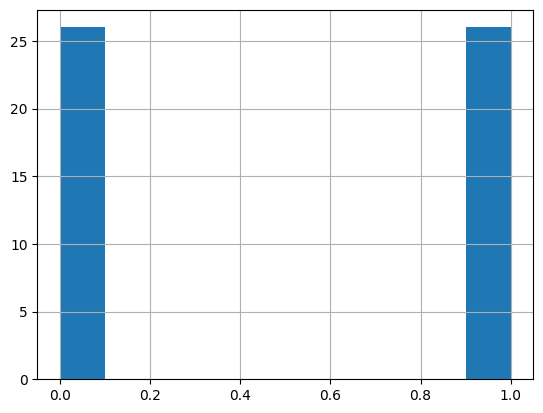

In [5]:
texts['Label'].hist()

#### Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [6]:
# размеченное и неразмеченное подмножества данных
texts = shuffle(texts)
labeled_texts, unlabeled_texts = train_test_split(texts, train_size=0.5, random_state=42)
labeled_texts

,Text,Label
26,Educators should receive more support and reco...,1
50,Online education offers flexibility but lacks ...,0
18,Resource allocation in schools often favors af...,0
30,Education policies should be informed by resea...,1
0,The impact of educational reforms remains unce...,1
42,Teacher training programs should focus more on...,1
10,Special education programs strive to support d...,1
3,"Despite budget constraints, the school has man...",1
15,Standardized curricula limit teachers' creativ...,0
43,Parental involvement is crucial for student su...,1


In [7]:
labeled_texts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 26 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
 1   Label   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [8]:
unlabeled_texts.head()

,Text,Label
34,Educational standards should be flexible to ac...,0
14,Education funding disparities perpetuate inequ...,1
45,Education should emphasize global citizenship ...,1
40,Standardized testing perpetuates inequities by...,0
19,Educational policies fail to address the diver...,0


In [9]:
unlabeled_texts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 34 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
 1   Label   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [10]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Text'])
    y = labeled_data['Label']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_texts)

In [11]:
unlabeled_texts = unlabeled_texts.dropna()
unlabeled_texts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 34 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
 1   Label   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [12]:
x_unlabeled = vect.transform(unlabeled_texts['Text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [13]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [14]:
uncertainty


array([0.98102336, 0.98541794, 0.96568833, 0.99962744, 0.99849517,
       0.97483111, 0.99997519, 0.99453825, 0.98356211, 0.99613081,
       0.95845598, 0.99842785, 0.99922502, 0.97580579, 0.92906431,
       0.99790735, 0.99990324, 0.97741647, 0.98287026, 0.99999303,
       0.97667878, 0.9861015 , 0.98592207, 0.99407705, 0.98952248,
       0.99765223])

In [15]:
# Выбираем 10 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_texts_new = unlabeled_texts.iloc[uncertainty.argsort()[:10]]
unlabeled_texts_new = unlabeled_texts.iloc[uncertainty.argsort()[10:]]
labeled_texts_new

,Text,Label
44,Project-based learning encourages collaboratio...,1
31,Teacher diversity is important for promoting i...,1
45,Education should emphasize global citizenship ...,1
7,Educational technology has the potential to re...,1
29,Access to quality education should be a univer...,1
4,The true effectiveness of online learning plat...,0
9,Teacher tenure policies aim to protect educato...,1
34,Educational standards should be flexible to ac...,0
39,Public education should be funded adequately t...,0
21,Teacher evaluations based on student test scor...,0


#### Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [16]:
# Cохранение данных для ручной разметки
labeled_texts_new.to_csv("part_texts.csv", index=False)


In [17]:
# Загрузка данных после ручной разметки
labeled_texts_new = pd.read_csv("part_texts.csv", engine="python", encoding="utf-8", on_bad_lines="skip", encoding_errors="ignore")


In [18]:
labeled_texts_new

,Text,Label
0,Project-based learning encourages collaboratio...,1
1,Teacher diversity is important for promoting i...,1
2,Education should emphasize global citizenship ...,1
3,Educational technology has the potential to re...,1
4,Access to quality education should be a univer...,1
5,The true effectiveness of online learning plat...,0
6,Teacher tenure policies aim to protect educato...,1
7,Educational standards should be flexible to ac...,0
8,Public education should be funded adequately t...,0
9,Teacher evaluations based on student test scor...,0


#### Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [19]:
labeled_texts_united = pd.concat([labeled_texts, labeled_texts_new])

In [20]:
labeled_texts_united

,Text,Label
26,Educators should receive more support and reco...,1
50,Online education offers flexibility but lacks ...,0
18,Resource allocation in schools often favors af...,0
30,Education policies should be informed by resea...,1
0,The impact of educational reforms remains unce...,1
42,Teacher training programs should focus more on...,1
10,Special education programs strive to support d...,1
3,"Despite budget constraints, the school has man...",1
15,Standardized curricula limit teachers' creativ...,0
43,Parental involvement is crucial for student su...,1


#### Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [21]:
model, vect = train_model(labeled_texts_united)

In [22]:
texts_test = unlabeled_texts
texts_test


,Text,Label
34,Educational standards should be flexible to ac...,0
14,Education funding disparities perpetuate inequ...,1
45,Education should emphasize global citizenship ...,1
40,Standardized testing perpetuates inequities by...,0
19,Educational policies fail to address the diver...,0
7,Educational technology has the potential to re...,1
33,Standardized tests fail to capture the full ra...,0
41,Educational initiatives often prioritize short...,1
21,Teacher evaluations based on student test scor...,0
20,Charter schools divert resources from public e...,0


In [23]:
x_test = vect.transform(texts_test['Text'])
y_test_predicted = model.predict(x_test)
y_test_predicted


array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1])

#### Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [24]:
f1 = f1_score(texts_test['Label'], y_test_predicted)
f1

0.7096774193548387

# Вывод

Эфективность обученной модели оставляет желать лучшего. Ошибка в районе 30%.